## Exploratory Data Analysis and Initial Insights

- Performing EDA to analyze relationships between variables and understand why employees are leaving.



### Importing packages

In [1]:
 # For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Loading the dataset

In [2]:
# Importing saved dataset from previous part
df1 = pd.read_csv("hr_dataset_1.csv")

I will start by understanding how many employees left and what percentage of all employees this figure represents.

In [3]:
# Numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    11216
1     3516
Name: count, dtype: int64

left
0    0.761336
1    0.238664
Name: proportion, dtype: float64


In [4]:
df1.shape

(14732, 10)

**Out of 14732 employees, 3516(23.86%) left and 11216(76.13%) stayed.**

### Data visualizations

I will start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, I will also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

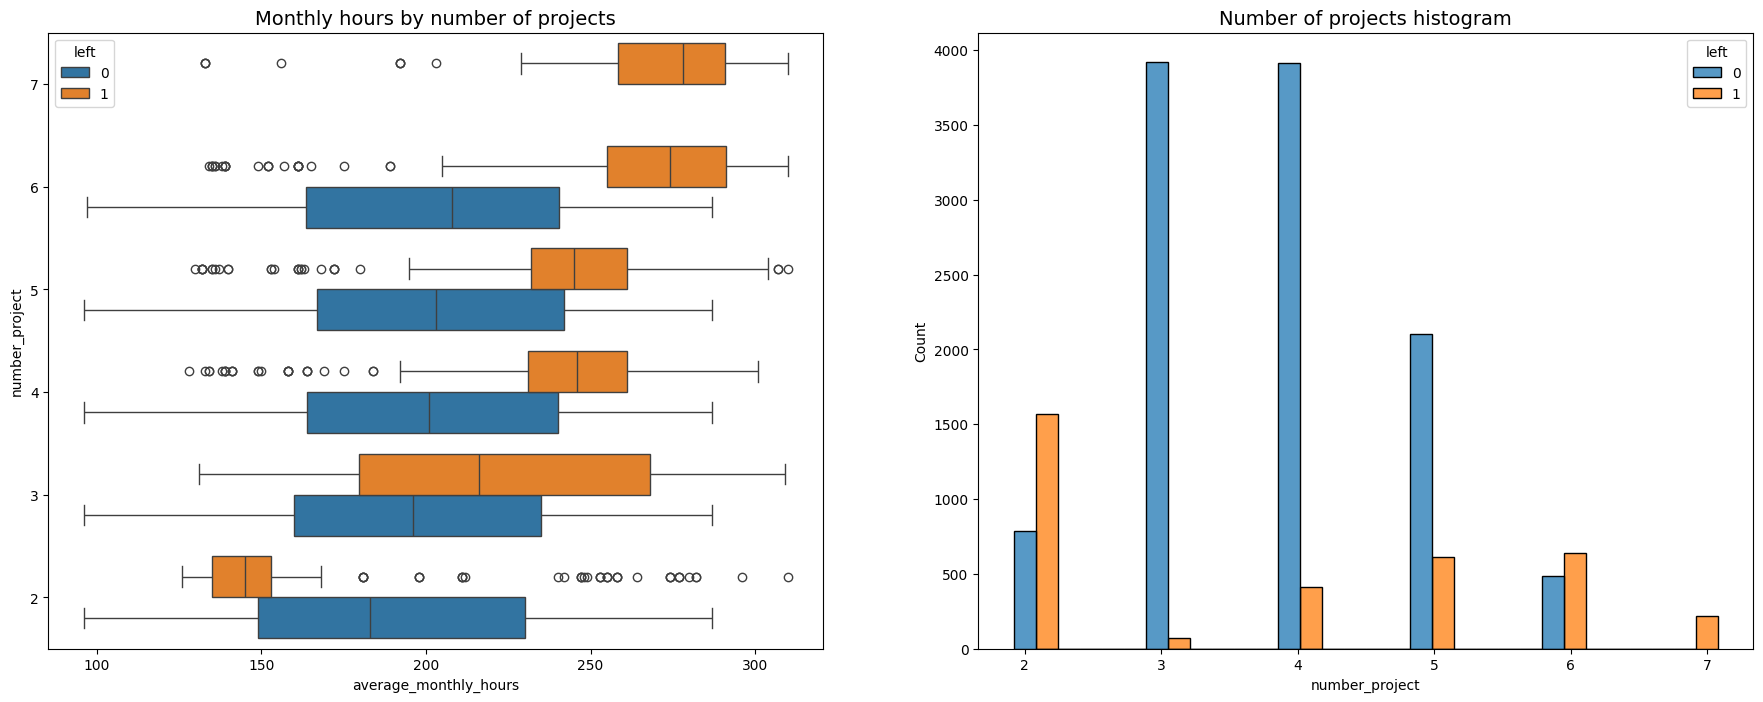

In [5]:
# Figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Displaying the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: 
- (A) those who worked considerably less than their peers with the same number of projects 
- (B) those who worked much more. 
- Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. 
- For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255-295 hours/month--much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3-4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours (8x5) and two weeks of vacation per year, then the average number of working hours per month of employees working Monday-Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group--even those who didn't leave the company--worked considerably more hours than this. It seems that employees here are overworked.

In [6]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    218
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave. 

Next I will examine the average monthly hours versus the satisfaction levels. 

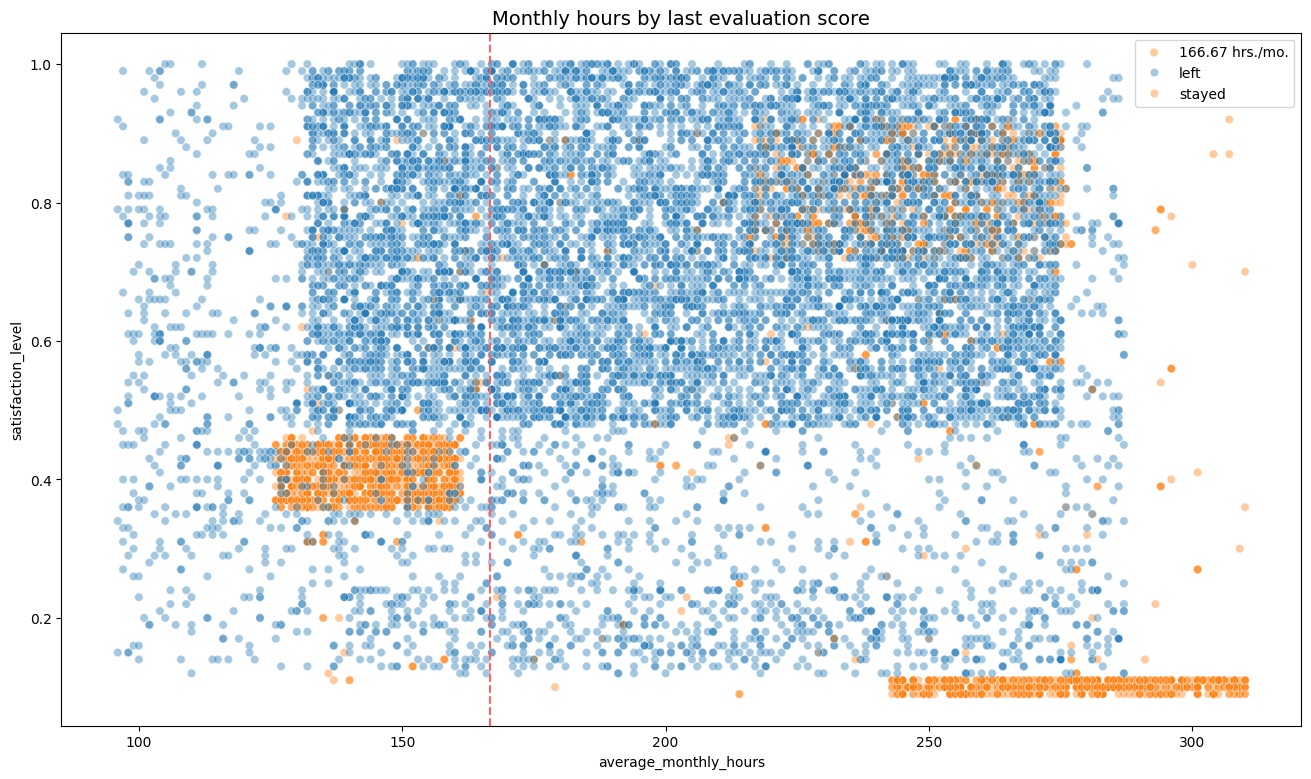

In [7]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

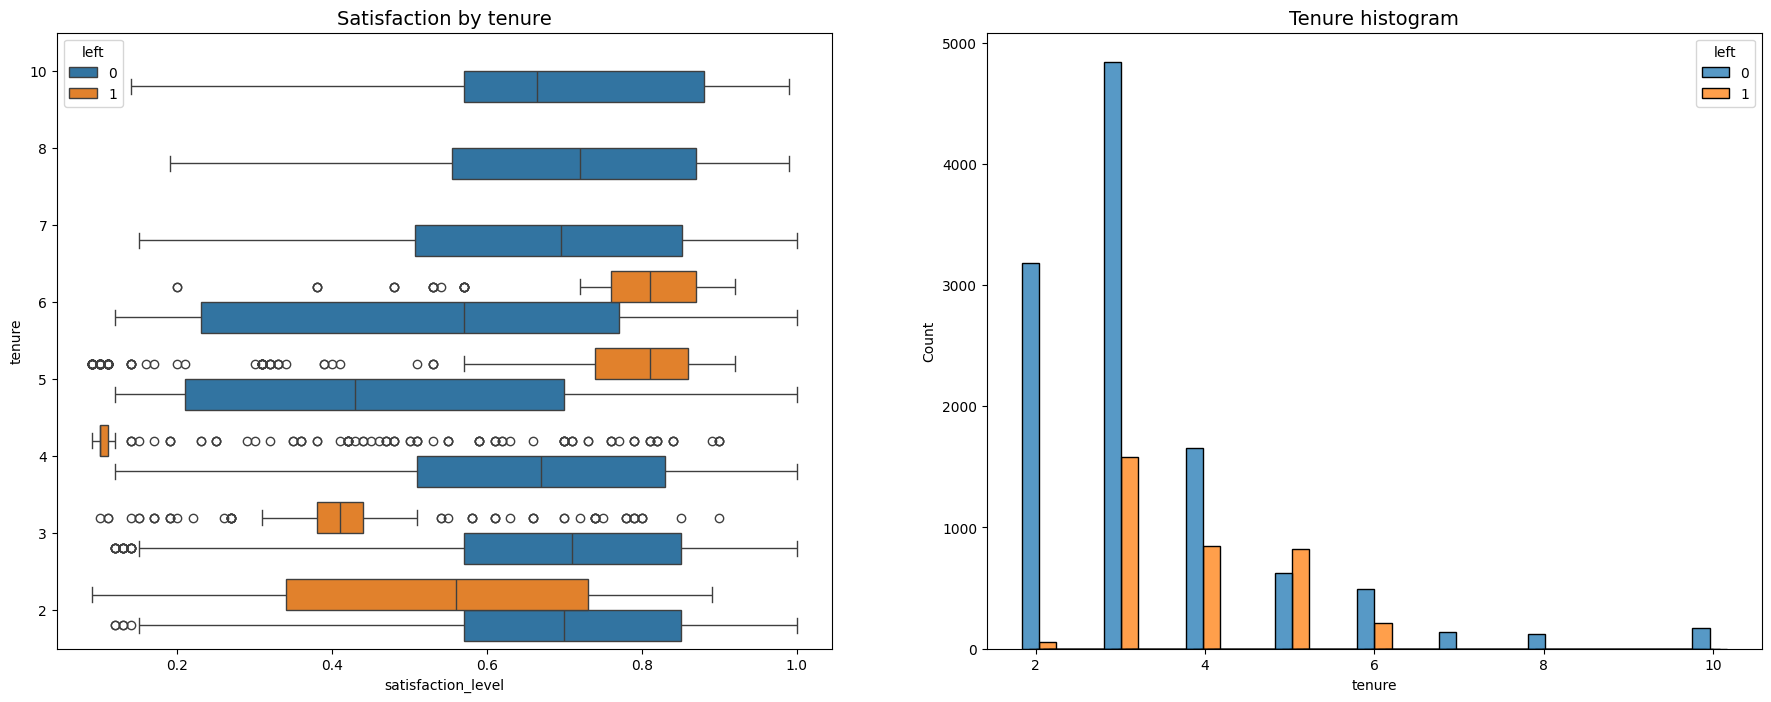

In [8]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations to make from this plot.
- Employees who left fall into two general categories: 
    - dissatisfied employees with shorter tenures 
    - very satisfied employees with medium-length tenures
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

Calculating the mean and median satisfaction scores of employees who left and those who didn't.

In [9]:
# Mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.669135,0.69
1,0.444940,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Analyzing salary levels for different tenures.

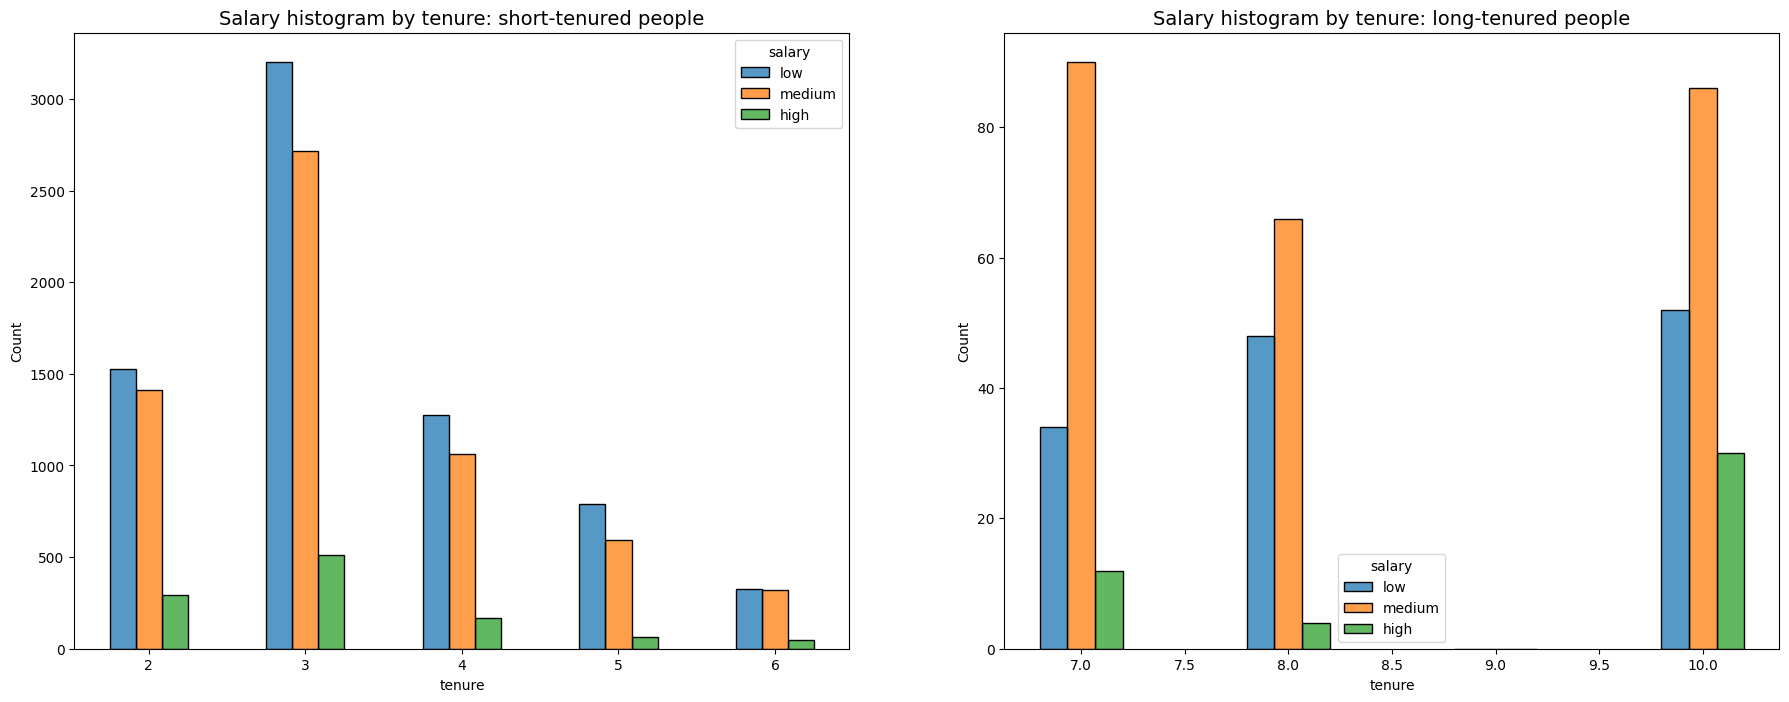

In [10]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Analysing whether there's a correlation between working long hours and receiving high evaluation scores. 

Creating a scatterplot of `average_monthly_hours` versus `last_evaluation`.

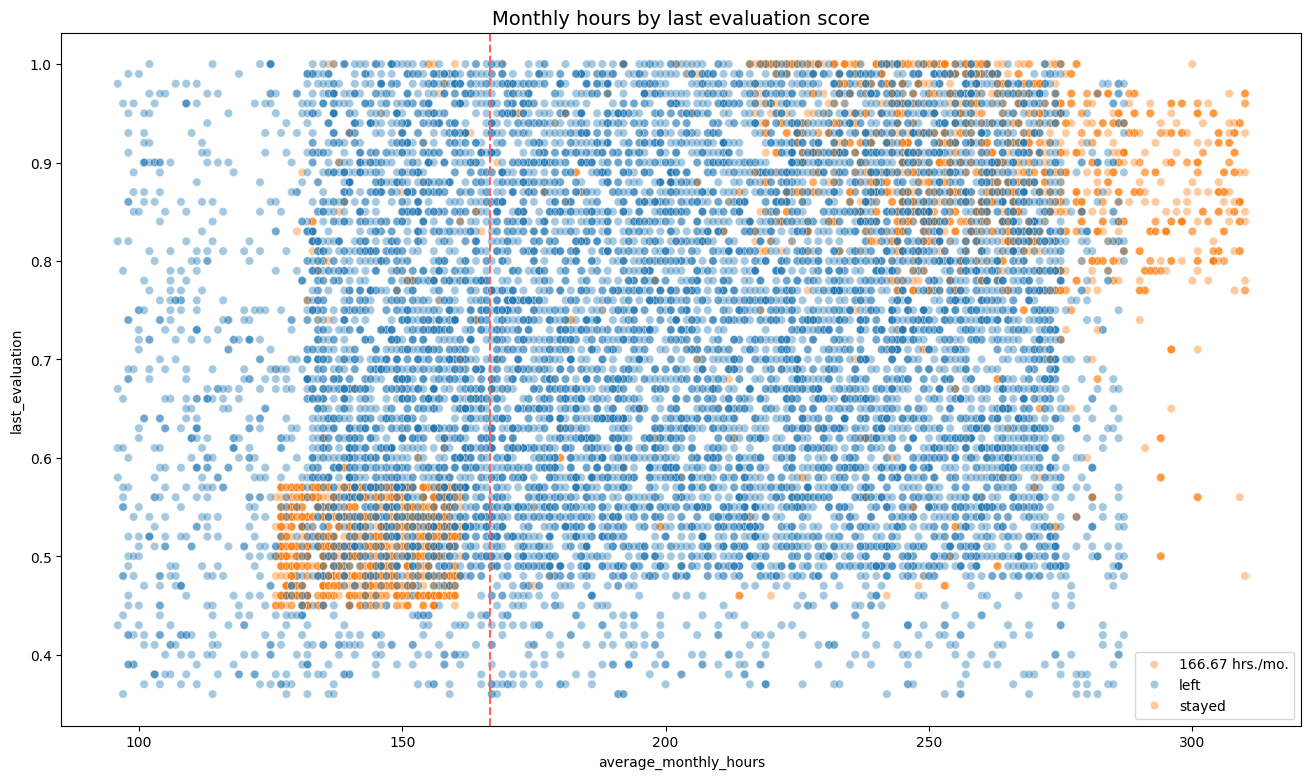

In [11]:
# Scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: 
    - Overworked employees who performed very well
    - Employees who worked slightly under the nominal monthly average of 166.67      hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Analysing whether employees who worked very long hours were promoted in the last five years.

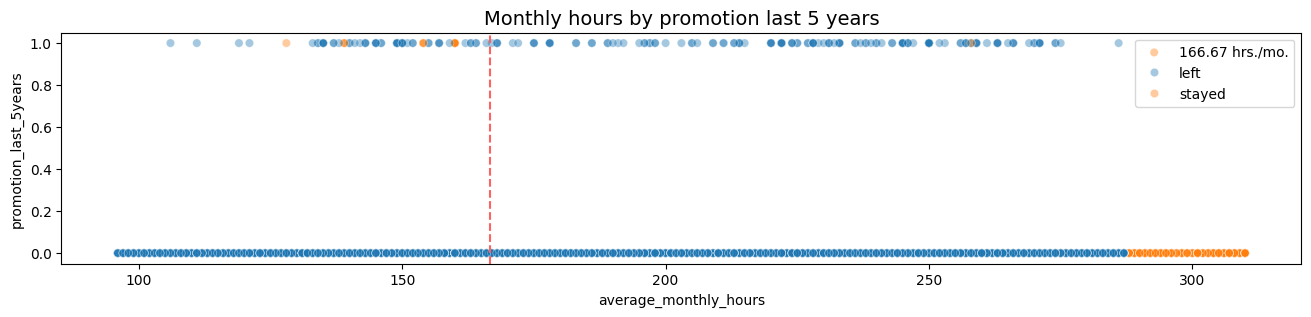

In [12]:
# Plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Inspecting how the employees who left are distributed across departments.

In [13]:
# Counts for each department
df1["department"].value_counts()

department
sales          4108
technical      2711
support        2218
IT             1218
product_mng     881
marketing       828
RandD           772
accounting      748
hr              717
management      531
Name: count, dtype: int64

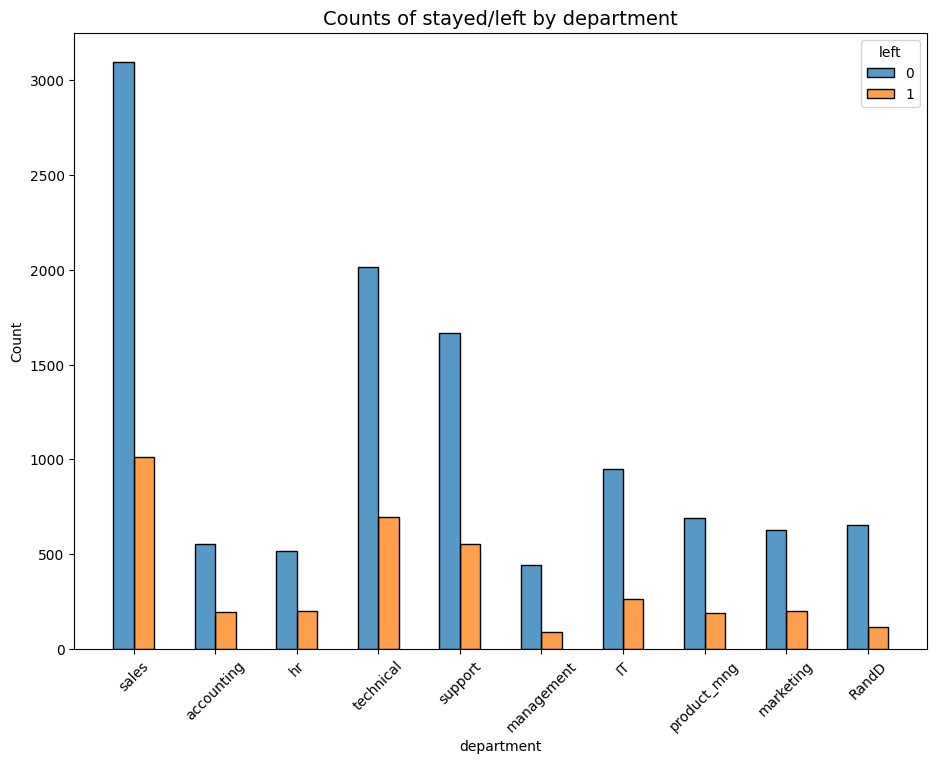

In [14]:
# Stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Checking for strong correlations between variables in the data.

In [15]:
# Creating a separate dataframe without the categorical variables and just the numerical ones
# This is done to prepare the data for "corr()" function, as it only works with numerical data
df_numbers = df1.drop(columns=['department'])

In [16]:
df_numbers['salary'] = df_numbers['salary'].map({'low': 1, 'medium': 2, 'high': 3})

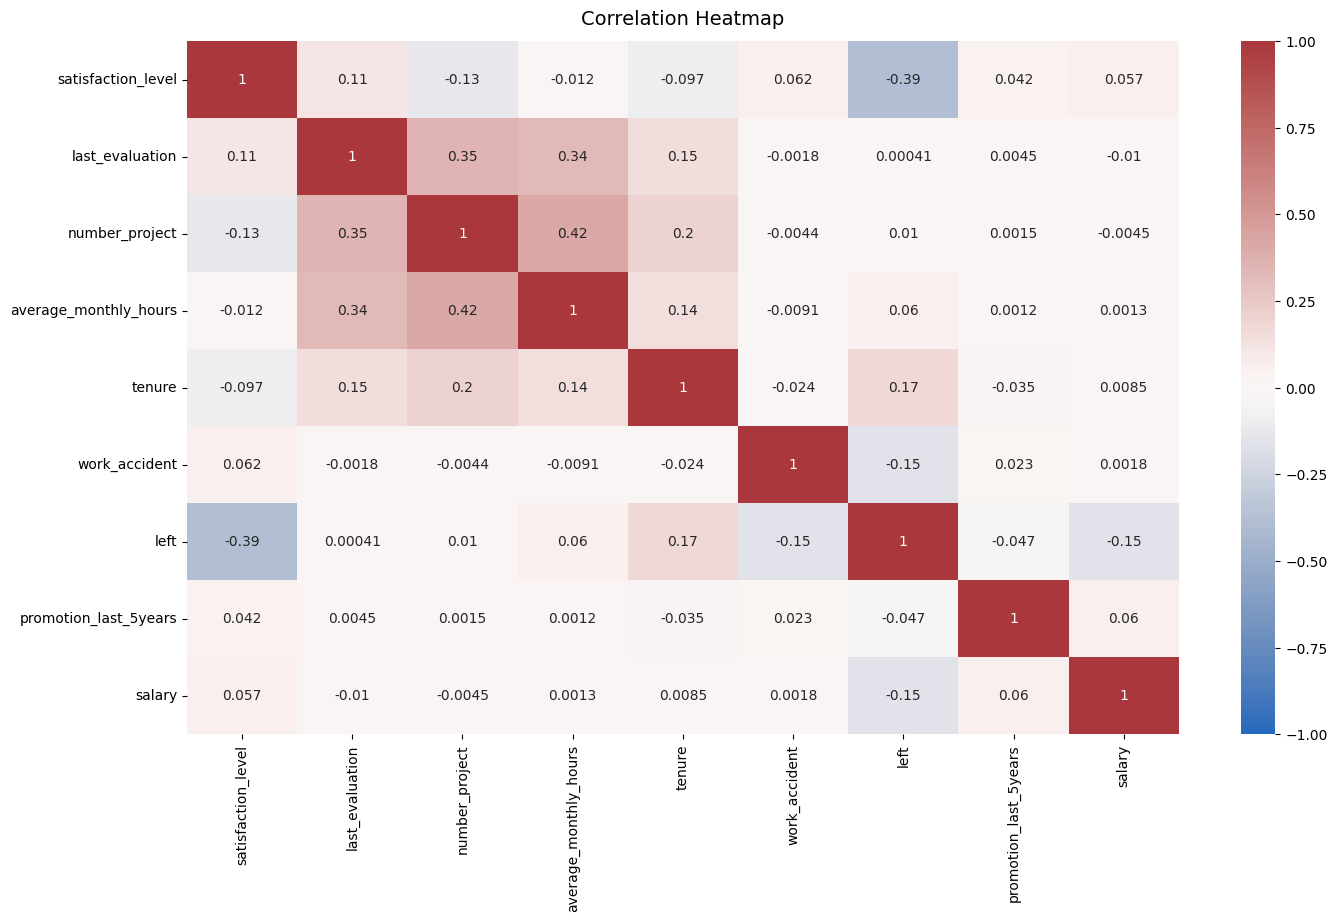

In [17]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numbers.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

In [18]:
# Saving the dataset from this part
df1.to_csv("hr_dataset_2.csv", index=False)


## **Initial Insights**

It appears that employees are leaving the company as a result of poor management. 

Leaving is tied to 
- longer working hours
- many projects (>4)
- no promotion despite the efforts
- generally lower satisfaction levels. 

It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 